# Setup

In [ ]:
import os
import joblib
import zipfile
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [ ]:
os.chdir('/content/drive/MyDrive/Projects/Spam')

# Data

## Fetching data

In [ ]:
!kaggle datasets download -d abdallahwagih/spam-emails

with zipfile.ZipFile('spam-emails.zip', 'r') as zip_ref:
    zip_ref.extractall('data/raw/')

!rm -r spam-emails.zip

Dataset URL: https://www.kaggle.com/datasets/abdallahwagih/spam-emails
License(s): apache-2.0
  0% 0.00/207k [00:00<?, ?B/s]
100% 207k/207k [00:00<00:00, 12.3MB/s]


## loading data

In [ ]:
df = pd.read_csv('data/raw/spam.csv')

df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Data Analysis

In [ ]:
df.shape

(5572, 2)

<Axes: ylabel='count'>

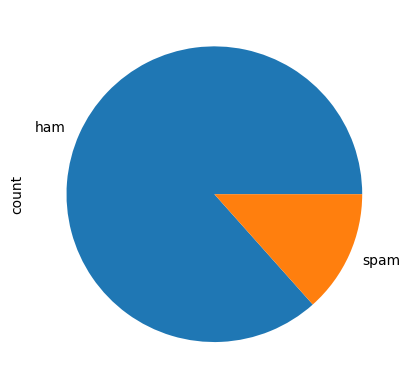

In [ ]:
df.Category.value_counts().plot(kind='pie')

In [ ]:
df.isnull().sum()

,0
Category,0
Message,0


## Data Preprocessing

In [ ]:
df['Category'] = df['Category'].map({'spam': 1, 'ham': 0})

X = df['Message']
y = df['Category']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=3000)
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()

# Model

In [ ]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_tfidf, y_train)
svm_pred = svm_model.predict(X_test_tfidf)

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, svm_pred)}")

Accuracy: 0.9901345291479821


In [ ]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       1.00      0.93      0.96       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.98      1115
weighted avg       0.99      0.99      0.99      1115



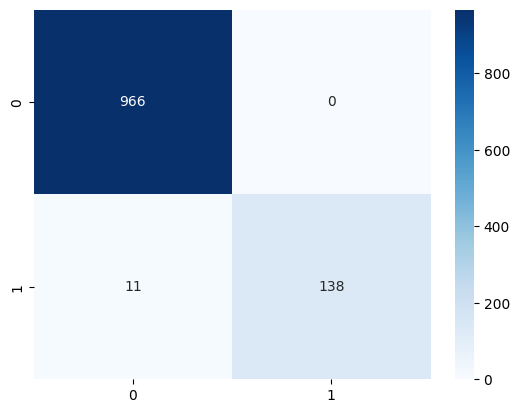

In [ ]:
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, fmt='d', cmap='Blues');

# Saving

In [ ]:
os.makedirs('data/inference', exist_ok=True)
pd.concat([
    X_test,
    y_test.map({0: "Ham", 1: "Spam"})
], axis=1).to_csv('data/inference/test.csv', index=False)

In [ ]:
os.makedirs('models/')

# Save the trained TfidfVectorizer
joblib.dump(vectorizer, 'models/tfidf_vectorizer.pkl')

# Save the trained SVC model
joblib.dump(svm_model, 'models/svm_model.pkl')

['models/svm_model.pkl']

# Inference

In [ ]:
import joblib

# Load the TfidfVectorizer
vectorizer = joblib.load('models/tfidf_vectorizer.pkl')

# Load the SVC model
svm_model = joblib.load('models/svm_model.pkl')

def predict(text):
    new_data_tfidf = vectorizer.transform(text).toarray()
    predictions = svm_model.predict(new_data_tfidf)

    if predictions == 1:
        return 'Spam'
    else:
        return 'Ham'

if __name__ == "__main__":
    import pandas as pd

    text = ['Congratulations! Thanks to a good friend U have WON the £2,000 Xmas prize. 2 claim is easy, just call 08718726971 NOW! Only 10p per minute. BT-national-rate.']

    print('Text:', text)
    print("Prediction:", predict(text))


Text: ['Congratulations! Thanks to a good friend U have WON the £2,000 Xmas prize. 2 claim is easy, just call 08718726971 NOW! Only 10p per minute. BT-national-rate.']
Prediction: Spam


In [ ]:
!python --version

Python 3.10.12
